# **Preparação de ambiente**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Produção de gás natural (metros cúbicos) 1997-2025
df = pd.read_csv('producao-gas-natural-1000m3-1997-2025.csv', sep=';')
df.head()

,ANO,MÊS,GRANDE REGIÃO,UNIDADE DA FEDERAÇÃO,PRODUTO,LOCALIZAÇÃO,PRODUÇÃO
0,1997,JAN,REGIÃO NORTE,AMAZONAS,GÁS NATURAL,TERRA,50891
1,1997,FEV,REGIÃO NORTE,AMAZONAS,GÁS NATURAL,TERRA,48632
2,1997,MAR,REGIÃO NORTE,AMAZONAS,GÁS NATURAL,TERRA,50528
3,1997,ABR,REGIÃO NORTE,AMAZONAS,GÁS NATURAL,TERRA,50588
4,1997,MAI,REGIÃO NORTE,AMAZONAS,GÁS NATURAL,TERRA,44179


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7467 entries, 0 to 7466
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ANO                   7467 non-null   int64 
 1   MÊS                   7467 non-null   object
 2   GRANDE REGIÃO         7467 non-null   object
 3   UNIDADE DA FEDERAÇÃO  7467 non-null   object
 4   PRODUTO               7467 non-null   object
 5   LOCALIZAÇÃO           7467 non-null   object
 6   PRODUÇÃO              7467 non-null   object
dtypes: int64(1), object(6)
memory usage: 408.5+ KB


In [4]:
df.shape

(7467, 7)

# **Entendimento e Limpeza dos Dados**

In [5]:
df.head()

,ANO,MÊS,GRANDE REGIÃO,UNIDADE DA FEDERAÇÃO,PRODUTO,LOCALIZAÇÃO,PRODUÇÃO
0,1997,JAN,REGIÃO NORTE,AMAZONAS,GÁS NATURAL,TERRA,50891
1,1997,FEV,REGIÃO NORTE,AMAZONAS,GÁS NATURAL,TERRA,48632
2,1997,MAR,REGIÃO NORTE,AMAZONAS,GÁS NATURAL,TERRA,50528
3,1997,ABR,REGIÃO NORTE,AMAZONAS,GÁS NATURAL,TERRA,50588
4,1997,MAI,REGIÃO NORTE,AMAZONAS,GÁS NATURAL,TERRA,44179


In [6]:
df.isnull().sum()

,0
ANO,0
MÊS,0
GRANDE REGIÃO,0
UNIDADE DA FEDERAÇÃO,0
PRODUTO,0
LOCALIZAÇÃO,0
PRODUÇÃO,0


In [7]:
#renomeando colunas
df.rename(columns={'ANO': 'ano','MÊS': 'mes','GRANDE REGIÃO': 'regiao', 'UNIDADE DA FEDERAÇÃO': 'uf','PRODUTO': 'produto','LOCALIZAÇÃO':'localizacao'  ,'PRODUÇÃO': 'producao'}, inplace=True)
df.head()

,ano,mes,regiao,uf,produto,localizacao,producao
0,1997,JAN,REGIÃO NORTE,AMAZONAS,GÁS NATURAL,TERRA,50891
1,1997,FEV,REGIÃO NORTE,AMAZONAS,GÁS NATURAL,TERRA,48632
2,1997,MAR,REGIÃO NORTE,AMAZONAS,GÁS NATURAL,TERRA,50528
3,1997,ABR,REGIÃO NORTE,AMAZONAS,GÁS NATURAL,TERRA,50588
4,1997,MAI,REGIÃO NORTE,AMAZONAS,GÁS NATURAL,TERRA,44179


In [8]:
df.loc[df['mes'] == 'JAN', 'mes'] = 1
df.loc[df['mes'] == 'FEV', 'mes'] = 2
df.loc[df['mes'] == 'MAR', 'mes'] = 3
df.loc[df['mes'] == 'ABR', 'mes'] = 4
df.loc[df['mes'] == 'MAI', 'mes'] = 5
df.loc[df['mes'] == 'JUN', 'mes'] = 6
df.loc[df['mes'] == 'JUL', 'mes'] = 7
df.loc[df['mes'] == 'AGO', 'mes'] = 8
df.loc[df['mes'] == 'SET', 'mes'] = 9
df.loc[df['mes'] == 'OUT', 'mes'] = 10
df.loc[df['mes'] == 'NOV', 'mes'] = 11
df.loc[df['mes'] == 'DEZ', 'mes'] = 12
df.head()

,ano,mes,regiao,uf,produto,localizacao,producao
0,1997,1,REGIÃO NORTE,AMAZONAS,GÁS NATURAL,TERRA,50891
1,1997,2,REGIÃO NORTE,AMAZONAS,GÁS NATURAL,TERRA,48632
2,1997,3,REGIÃO NORTE,AMAZONAS,GÁS NATURAL,TERRA,50528
3,1997,4,REGIÃO NORTE,AMAZONAS,GÁS NATURAL,TERRA,50588
4,1997,5,REGIÃO NORTE,AMAZONAS,GÁS NATURAL,TERRA,44179


In [9]:
df['mes'] = df['mes'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7467 entries, 0 to 7466
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ano          7467 non-null   int64 
 1   mes          7467 non-null   int64 
 2   regiao       7467 non-null   object
 3   uf           7467 non-null   object
 4   produto      7467 non-null   object
 5   localizacao  7467 non-null   object
 6   producao     7467 non-null   object
dtypes: int64(2), object(5)
memory usage: 408.5+ KB


In [10]:
df['data'] = pd.to_datetime(df['ano'].astype(str) + '-' + df['mes'].astype(str), format='%Y-%m')
df.head()

,ano,mes,regiao,uf,produto,localizacao,producao,data
0,1997,1,REGIÃO NORTE,AMAZONAS,GÁS NATURAL,TERRA,50891,1997-01-01
1,1997,2,REGIÃO NORTE,AMAZONAS,GÁS NATURAL,TERRA,48632,1997-02-01
2,1997,3,REGIÃO NORTE,AMAZONAS,GÁS NATURAL,TERRA,50528,1997-03-01
3,1997,4,REGIÃO NORTE,AMAZONAS,GÁS NATURAL,TERRA,50588,1997-04-01
4,1997,5,REGIÃO NORTE,AMAZONAS,GÁS NATURAL,TERRA,44179,1997-05-01


In [11]:
df['producao'] = df['producao'].astype(str).str.replace(',', '.', regex=False)
df['producao'] = df['producao'].astype(float).astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7467 entries, 0 to 7466
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ano          7467 non-null   int64         
 1   mes          7467 non-null   int64         
 2   regiao       7467 non-null   object        
 3   uf           7467 non-null   object        
 4   produto      7467 non-null   object        
 5   localizacao  7467 non-null   object        
 6   producao     7467 non-null   int64         
 7   data         7467 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 466.8+ KB


In [12]:
df.head()

,ano,mes,regiao,uf,produto,localizacao,producao,data
0,1997,1,REGIÃO NORTE,AMAZONAS,GÁS NATURAL,TERRA,50891,1997-01-01
1,1997,2,REGIÃO NORTE,AMAZONAS,GÁS NATURAL,TERRA,48632,1997-02-01
2,1997,3,REGIÃO NORTE,AMAZONAS,GÁS NATURAL,TERRA,50528,1997-03-01
3,1997,4,REGIÃO NORTE,AMAZONAS,GÁS NATURAL,TERRA,50588,1997-04-01
4,1997,5,REGIÃO NORTE,AMAZONAS,GÁS NATURAL,TERRA,44179,1997-05-01


In [13]:
agrupamento_regiao = df.groupby(['regiao']).size()
agrupamento_regiao

,0
regiao,
REGIÃO NORDESTE,4042
REGIÃO NORTE,684
REGIÃO SUDESTE,2058
REGIÃO SUL,683


In [14]:
agrupamento_uf = df.groupby(['uf']).size()
agrupamento_uf

,0
uf,
ALAGOAS,686
AMAZONAS,684
BAHIA,686
CEARÁ,686
ESPÍRITO SANTO,686
MARANHÃO,612
PARANÁ,683
RIO DE JANEIRO,686
RIO GRANDE DO NORTE,686


# **Análise Descritiva**

In [15]:
df.head()

,ano,mes,regiao,uf,produto,localizacao,producao,data
0,1997,1,REGIÃO NORTE,AMAZONAS,GÁS NATURAL,TERRA,50891,1997-01-01
1,1997,2,REGIÃO NORTE,AMAZONAS,GÁS NATURAL,TERRA,48632,1997-02-01
2,1997,3,REGIÃO NORTE,AMAZONAS,GÁS NATURAL,TERRA,50528,1997-03-01
3,1997,4,REGIÃO NORTE,AMAZONAS,GÁS NATURAL,TERRA,50588,1997-04-01
4,1997,5,REGIÃO NORTE,AMAZONAS,GÁS NATURAL,TERRA,44179,1997-05-01


In [16]:
df['producao'].describe()

,producao
count,7.467000e+03
mean,1.109981e+05
std,3.493627e+05
min,0.000000e+00
25%,0.000000e+00
50%,7.570000e+03
75%,6.663900e+04
max,4.539439e+06


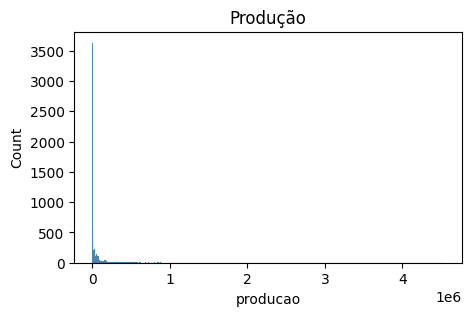

In [17]:
plt.figure(figsize=(5, 3))
sns.histplot(df['producao']).set_title('Produção')
plt.show()

In [18]:
#Produção total nacional por ano.
total_ano = df.groupby('ano')['producao'].sum()
total_ano

,producao
ano,
1997,9824721
1998,10787604
1999,11854973
2000,13282824
2001,13998791
2002,15525140
2003,15792049
2004,16971140
2005,17699190


In [19]:
#total anual regiao norte
norte = df[df['regiao'] == 'REGIÃO NORTE']
total_ano_norte = norte.groupby('ano')['producao'].sum()
total_ano_norte

,producao
ano,
1997,529726
1998,617948
1999,734154
2000,2000200
2001,2427330
2002,2743183
2003,2992558
2004,3620760
2005,3567205


In [20]:
#total anual regiao nordeste
nordeste = df[df['regiao'] == 'REGIÃO NORDESTE']
total_ano_nordeste = nordeste.groupby('ano')['producao'].sum()
total_ano_nordeste

,producao
ano,
1997,4303885
1998,4540021
1999,4649523
2000,4873116
2001,4831953
2002,5070544
2003,5185333
2004,5612857
2005,5198317


In [21]:
#total anual regiao sudeste
sudeste = df[df['regiao'] == 'REGIÃO SUDESTE']
total_ano_sudeste = sudeste.groupby('ano')['producao'].sum()
total_ano_sudeste

,producao
ano,
1997,4830457
1998,5486213
1999,6392869
2000,6362302
2001,6701254
2002,7702026
2003,7557761
2004,7672300
2005,8865957


In [22]:
#total anual regiao sul
sul = df[df['regiao'] == 'REGIÃO SUL']
total_ano_sul = sul.groupby('ano')['producao'].sum()
total_ano_sul

,producao
ano,
1997,160653
1998,143422
1999,78427
2000,47206
2001,38254
2002,9387
2003,56397
2004,65223
2005,67711


In [23]:
agrupamento_localizacao = df.groupby(['localizacao']).size()
agrupamento_localizacao

,0
localizacao,
MAR,3730
TERRA,3737


In [24]:
#total produzido por localização
total_localizacao = df.groupby('localizacao')['producao'].sum()
total_localizacao

,producao
localizacao,
MAR,633355269
TERRA,195467612


In [25]:
#maiores registros
maiores_registros = df.sort_values(by='producao', ascending=False).head(10)
maiores_registros

,ano,mes,regiao,uf,produto,localizacao,producao,data
7340,2025,7,REGIÃO SUDESTE,RIO DE JANEIRO,GÁS NATURAL,MAR,4539439,2025-07-01
7338,2025,5,REGIÃO SUDESTE,RIO DE JANEIRO,GÁS NATURAL,MAR,4191415,2025-05-01
7339,2025,6,REGIÃO SUDESTE,RIO DE JANEIRO,GÁS NATURAL,MAR,4177223,2025-06-01
7336,2025,3,REGIÃO SUDESTE,RIO DE JANEIRO,GÁS NATURAL,MAR,4064293,2025-03-01
7337,2025,4,REGIÃO SUDESTE,RIO DE JANEIRO,GÁS NATURAL,MAR,3939493,2025-04-01
7144,2024,12,REGIÃO SUDESTE,RIO DE JANEIRO,GÁS NATURAL,MAR,3812968,2024-12-01
7334,2025,1,REGIÃO SUDESTE,RIO DE JANEIRO,GÁS NATURAL,MAR,3806151,2025-01-01
7141,2024,9,REGIÃO SUDESTE,RIO DE JANEIRO,GÁS NATURAL,MAR,3798598,2024-09-01
7140,2024,8,REGIÃO SUDESTE,RIO DE JANEIRO,GÁS NATURAL,MAR,3667152,2024-08-01
7143,2024,11,REGIÃO SUDESTE,RIO DE JANEIRO,GÁS NATURAL,MAR,3630784,2024-11-01


In [26]:
#maiores produtores
produtores = df.groupby('uf')['producao'].sum()
maiores_produtores = produtores.sort_values(ascending=False).head(11)
maiores_produtores

,producao
uf,
RIO DE JANEIRO,439955293
AMAZONAS,108850339
SÃO PAULO,76958293
BAHIA,66047202
ESPÍRITO SANTO,56895911
RIO GRANDE DO NORTE,21422886
SERGIPE,19563291
MARANHÃO,18634984
ALAGOAS,18054105


# **Visualização Univariada**

In [27]:
df.head()

,ano,mes,regiao,uf,produto,localizacao,producao,data
0,1997,1,REGIÃO NORTE,AMAZONAS,GÁS NATURAL,TERRA,50891,1997-01-01
1,1997,2,REGIÃO NORTE,AMAZONAS,GÁS NATURAL,TERRA,48632,1997-02-01
2,1997,3,REGIÃO NORTE,AMAZONAS,GÁS NATURAL,TERRA,50528,1997-03-01
3,1997,4,REGIÃO NORTE,AMAZONAS,GÁS NATURAL,TERRA,50588,1997-04-01
4,1997,5,REGIÃO NORTE,AMAZONAS,GÁS NATURAL,TERRA,44179,1997-05-01


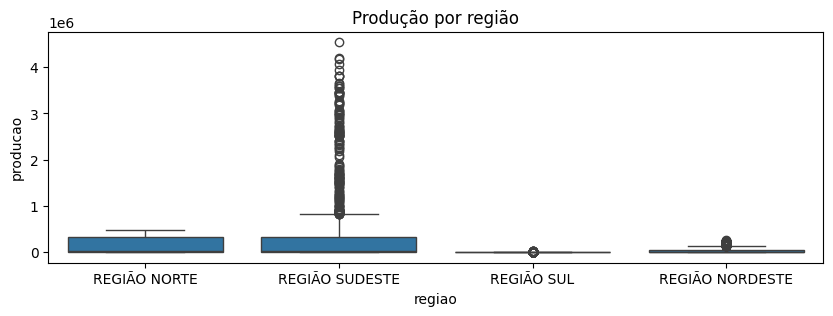

In [28]:
#boxplot por região, quem concentra mais produção
plt.figure(figsize=(10, 3))
sns.boxplot(x='regiao', y='producao', data=df).set_title('Produção por região')
plt.show()

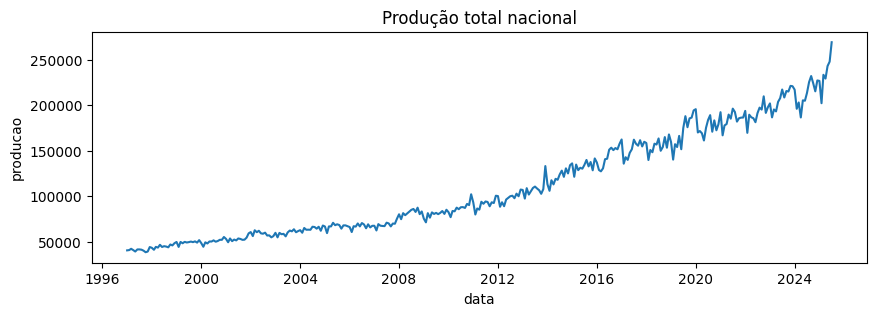

In [29]:
#serie temporal da produção total nacional
plt.figure(figsize=(10, 3))
sns.lineplot(x='data', y='producao', data=df, errorbar=None).set_title('Produção total nacional')
plt.show()

In [30]:
#valor maximo
ts = df.groupby('data')['producao'].sum()
ts.index.max()

Timestamp('2025-07-01 00:00:00')

In [31]:
#valor minimo
ts.index.min()

Timestamp('1997-01-01 00:00:00')

# **Visualização Bivariada**

In [32]:
df.head()

,ano,mes,regiao,uf,produto,localizacao,producao,data
0,1997,1,REGIÃO NORTE,AMAZONAS,GÁS NATURAL,TERRA,50891,1997-01-01
1,1997,2,REGIÃO NORTE,AMAZONAS,GÁS NATURAL,TERRA,48632,1997-02-01
2,1997,3,REGIÃO NORTE,AMAZONAS,GÁS NATURAL,TERRA,50528,1997-03-01
3,1997,4,REGIÃO NORTE,AMAZONAS,GÁS NATURAL,TERRA,50588,1997-04-01
4,1997,5,REGIÃO NORTE,AMAZONAS,GÁS NATURAL,TERRA,44179,1997-05-01


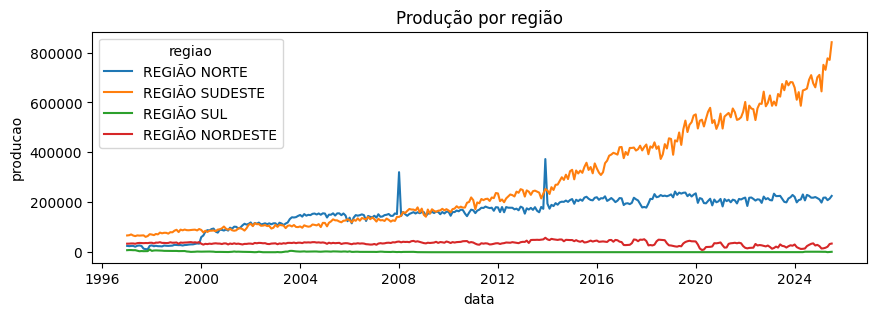

In [33]:
#Gráfico de linhas da produção ao longo do tempo por região.
plt.figure(figsize=(10, 3))
sns.lineplot(x='data', y='producao', hue='regiao', data=df, errorbar=None).set_title('Produção por região')
plt.show()

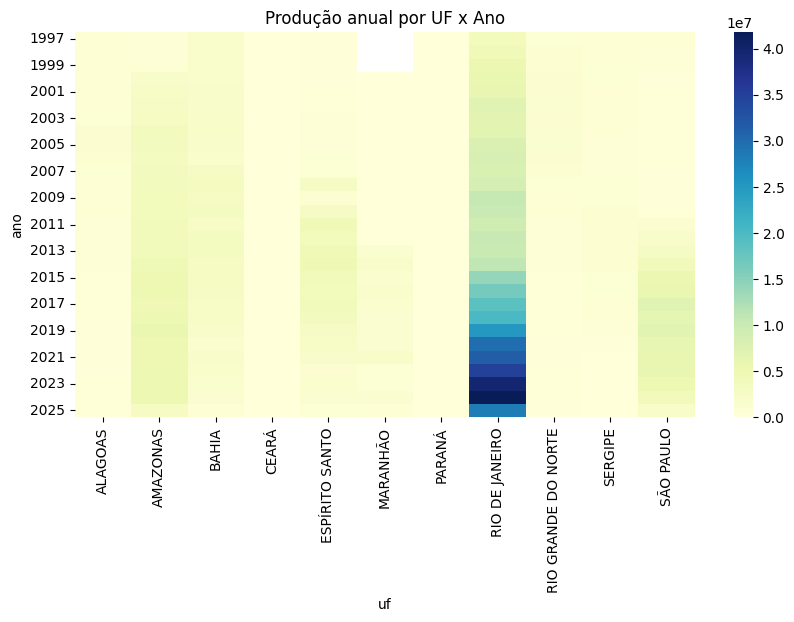

In [34]:
#Heatmap com produção anual por UF x Ano.
plt.figure(figsize=(10, 5))
sns.heatmap(df.pivot_table(index='ano', columns='uf', values='producao', aggfunc='sum'), cmap='YlGnBu').set_title('Produção anual por UF x Ano')
plt.show()

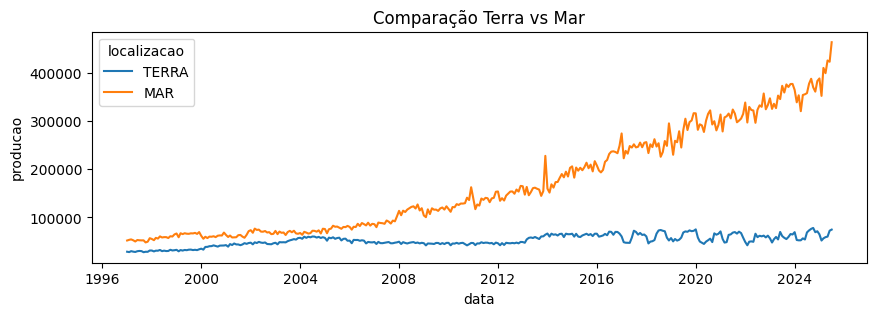

In [35]:
#Comparação Terra vs Mar
plt.figure(figsize=(10, 3))
sns.lineplot(x='data', y='producao', hue='localizacao', data=df, errorbar=None).set_title('Comparação Terra vs Mar')
plt.show()

# **Tendências e Padrões**

In [36]:
#Crescimento/queda da produção total ao longo do tempo (% de variação ano a ano).
def variacao(presente, anterior):
    return np.where(anterior == 0, 0, ((presente - anterior) / anterior) * 100)

df_total_ano = df.groupby('ano')['producao'].sum().reset_index()
df_total_ano['variacao'] = variacao(df_total_ano['producao'], df_total_ano['producao'].shift(1))
df_total_ano.head()

,ano,producao,variacao
0,1997,9824721,NaN
1,1998,10787604,9.800614
2,1999,11854973,9.894403
3,2000,13282824,12.044321
4,2001,13998791,5.390172


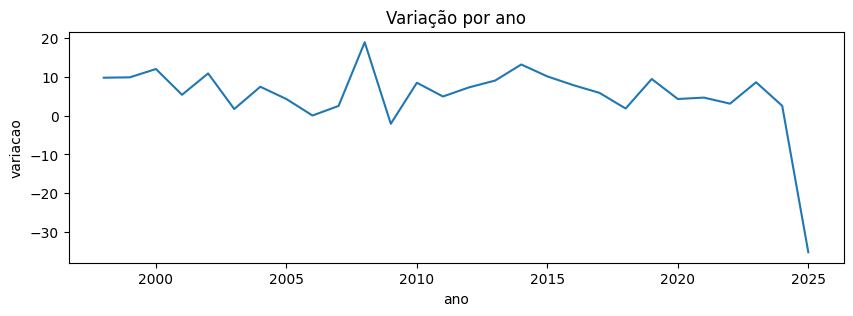

In [37]:
plt.figure(figsize=(10, 3))
sns.lineplot(x='ano', y='variacao', data=df_total_ano, errorbar=None).set_title('Variação por ano')
plt.show()

In [38]:
#média da produção por mês.
df_mes = df.groupby('mes')['producao'].mean().reset_index()
df_mes.head()

,mes,producao
0,1,112727.242857
1,2,101460.982595
2,3,109794.299051
3,4,107096.477848
4,5,111952.639241


In [39]:
#% da participação de cada região
df_regiao = df.groupby('regiao')['producao'].sum().reset_index()
df_regiao['producao'] = df_regiao['producao'] / df_regiao['producao'].sum() * 100
df_regiao

,regiao,producao
0,REGIÃO NORDESTE,17.535217
1,REGIÃO NORTE,13.133124
2,REGIÃO SUDESTE,69.231860
3,REGIÃO SUL,0.099799


In [42]:
df_regiao2024 = df[df['ano'] == 2024].groupby('regiao')['producao'].sum().reset_index()
df_regiao2024['producao'] = df_regiao2024['producao'] / df_regiao2024['producao'].sum() * 100
df_regiao2024

,regiao,producao
0,REGIÃO NORDESTE,6.190724
1,REGIÃO NORTE,9.313119
2,REGIÃO SUDESTE,84.439215
3,REGIÃO SUL,0.056942


# **Insights**

**Maior Produção 1997-2025 (localização):**
1.   Mar: 633355269 m³
2.   Terra: 195467612 m³





**Maior Registro**
1.   07/2025 - Rio de Janeiro (MAR): 4539439 m³

**Maiores Produtores**
1.   RIO DE JANEIRO:	439955293m³
2.   AMAZONAS:	108850339m³
3.   SÃO PAULO:	76958293m³
4.   BAHIA:	66047202m³
5.   ESPÍRITO SANTO:	56895911m³
6.   RIO GRANDE DO NORTE:	21422886m³
7.   SERGIPE:	19563291m³
8.   MARANHÃO:	18634984m³
9.   ALAGOAS:	18054105m³
10.  CEARÁ:	1613423m³
11.  PARANÁ:	827154m³

**% da Produção total por região em 2024 x total**
*   2024:
    1. Sudeste: 84.44%
    2. Norte: 9.31%
    3. Nordeste: 6.2%
    4. Sul: 0.06%
*   1997-2025:
    1. Sudeste: 69.23%
    2. Norte: 13.13%
    3. Nordeste: 17.53%
    4. Sul: 0.10%






# **Criação de Datasets / Download**

In [43]:
df.head()

,ano,mes,regiao,uf,produto,localizacao,producao,data
0,1997,1,REGIÃO NORTE,AMAZONAS,GÁS NATURAL,TERRA,50891,1997-01-01
1,1997,2,REGIÃO NORTE,AMAZONAS,GÁS NATURAL,TERRA,48632,1997-02-01
2,1997,3,REGIÃO NORTE,AMAZONAS,GÁS NATURAL,TERRA,50528,1997-03-01
3,1997,4,REGIÃO NORTE,AMAZONAS,GÁS NATURAL,TERRA,50588,1997-04-01
4,1997,5,REGIÃO NORTE,AMAZONAS,GÁS NATURAL,TERRA,44179,1997-05-01


In [50]:
#produção total, total_sudeste, total_norte, total_nordeste, total_sul. (1997-2025)
df_producao_total = df.groupby('data')['producao'].sum().reset_index()
df_producao_total_sudeste = df[df['regiao'] == 'REGIÃO SUDESTE'].groupby('data')['producao'].sum().reset_index()
df_producao_total_norte = df[df['regiao'] == 'REGIÃO NORTE'].groupby('data')['producao'].sum().reset_index()
df_producao_total_nordeste = df[df['regiao'] == 'REGIÃO NORDESTE'].groupby('data')['producao'].sum().reset_index()
df_producao_total_sul = df[df['regiao'] == 'REGIÃO SUL'].groupby('data')['producao'].sum().reset_index()

In [48]:
df['uf'].unique()

array(['AMAZONAS', 'SÃO PAULO', 'PARANÁ', 'BAHIA', 'SERGIPE', 'ALAGOAS',
       'RIO GRANDE DO NORTE', 'CEARÁ', 'RIO DE JANEIRO', 'ESPÍRITO SANTO',
       'MARANHÃO'], dtype=object)

In [49]:
#produção de cada estado (1997-2025)
df_amazonas = df[df['uf'] == 'AMAZONAS'].groupby('data')['producao'].sum().reset_index()
df_saopaulo = df[df['uf'] == 'SÃO PAULO'].groupby('data')['producao'].sum().reset_index()
df_parana = df[df['uf'] == 'PARANÁ'].groupby('data')['producao'].sum().reset_index()
df_bahia = df[df['uf'] == 'BAHIA'].groupby('data')['producao'].sum().reset_index()
df_sergipe = df[df['uf'] == 'SERGIPE'].groupby('data')['producao'].sum().reset_index()
df_alagoas = df[df['uf'] == 'ALAGOAS'].groupby('data')['producao'].sum().reset_index()
df_riograndedonorte = df[df['uf'] == 'RIO GRANDE DO NORTE'].groupby('data')['producao'].sum().reset_index()
df_maranhao = df[df['uf'] == 'MARANHÃO'].groupby('data')['producao'].sum().reset_index()
df_ceara = df[df['uf'] == 'CEARÁ'].groupby('data')['producao'].sum().reset_index()
df_riodejaneiro = df[df['uf'] == 'RIO DE JANEIRO'].groupby('data')['producao'].sum().reset_index()
df_espiritosanto = df[df['uf'] == 'ESPÍRITO SANTO'].groupby('data')['producao'].sum().reset_index()

In [51]:
dataframes = {
    "df_producao_total": df_producao_total,
    "df_producao_total_sudeste": df_producao_total_sudeste,
    "df_producao_total_norte": df_producao_total_norte,
    "df_producao_total_nordeste": df_producao_total_nordeste,
    "df_producao_total_sul": df_producao_total_sul,
    "df_amazonas": df_amazonas,
    "df_saopaulo": df_saopaulo,
    "df_parana": df_parana,
    "df_bahia": df_bahia,
    "df_sergipe": df_sergipe,
    "df_alagoas": df_alagoas,
    "df_riograndedonorte": df_riograndedonorte,
    "df_maranhao": df_maranhao,
    "df_ceara": df_ceara,
    "df_riodejaneiro": df_riodejaneiro,
    "df_espiritosanto": df_espiritosanto
}

#for nome, df_ in dataframes.items():
    #df_.to_csv(f"{nome}.csv", index=False, encoding="utf-8-sig")